In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline

In [2]:
#bring in data
human_df = pd.read_csv("../Data/human-development-index.csv")
happiness = pd.read_csv("../Data/happiness-cantril-ladder.csv")

cancer_death = pd.read_csv("../Data/cancer-death-rates.csv")
cancer_incidence = pd.read_csv("../Data/cancer-incidence.csv")
dalys = pd.read_csv("../Data/dalys-rate-from-all-causes.csv")
life_exp = pd.read_csv("../Data/life-expectancy.csv")
mental_health = pd.read_csv("../Data/mental-health-share-of-total-disease-burden.csv")

# Clean and Transform Data
Filter for the Country (maybe the year as well)<br>
Sort values for readability <br>
Insert the 'start_value' column, to get the 'score' calculation <br>
The 'score' value represents change from the 'start_value'. Calculated by subtracting the current value from the 'start_value'.<br>
Reduce columns <br>

In [3]:
#filter and clean the hdi data
human_df_clean = human_df[(human_df['Code'] == 'USA')&(human_df['Year'] >= 2006)&(human_df['Year'] < 2018)]
human_df_clean = human_df_clean.sort_values(['Year'], ascending = (False))
human_df_clean.insert(4, 'start_value_human', 0.901)
human_df_clean['score_human'] = round((human_df_clean['Human Development Index (UNDP)'] / human_df_clean['start_value_human'])-1,4)
human_df_clean = human_df_clean[['Entity', 'Year','score_human']]

In [4]:
#filter and clean happiness data
happiness_clean = happiness[(happiness['Code'] == 'USA')&(happiness['Year'] >= 2006)&(happiness['Year'] < 2018)]
happiness_clean = happiness_clean.sort_values(['Year'], ascending = (False))
happiness_clean.insert(4, 'start_value_h', 7.181794)
happiness_clean['score_happy'] = round((happiness_clean['Life satisfaction in Cantril Ladder (World Happiness Report 2019)'] / happiness_clean['start_value_h'])-1,4)
happiness_clean = happiness_clean[['Entity', 'Year','score_happy']]

In [5]:
#filter and clean cancer death data
cancer_death_clean = cancer_death[(cancer_death['Code'] == 'USA')&(cancer_death['Year'] >= 2006)&(cancer_death['Year'] < 2018)]
cancer_death_clean = cancer_death_clean.sort_values(['Year'], ascending = (False))
cancer_death_clean.insert(4, 'start_value_cd', 139.857968)
cancer_death_clean['score_cd'] = round((cancer_death_clean['Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_death_clean['start_value_cd'])-1,4)
cancer_death_clean = cancer_death_clean[['Entity', 'Year','score_cd']]

In [6]:
#filter and clean cancer incidence data
cancer_incidence_clean = cancer_incidence[(cancer_incidence['Code'] == 'USA')&(cancer_incidence['Year'] >= 2006)&(cancer_incidence['Year'] < 2018)]
cancer_incidence_clean = cancer_incidence_clean.sort_values(['Year'], ascending = (False))
cancer_incidence_clean.insert(4, 'start_value_ci', 1279.477805)
cancer_incidence_clean['score_ci'] = round((cancer_incidence_clean['Incidence - Neoplasms - Sex: Both - Age: Age-standardized (Rate)'] / cancer_incidence_clean['start_value_ci'])-1,4)
cancer_incidence_clean = cancer_incidence_clean[['Entity', 'Year','score_ci']]

In [7]:
#filter and clean dalys data
dalys_clean = dalys[(dalys['Code'] == 'USA')&(dalys['Year'] >= 2006)&(dalys['Year'] < 2018)]
dalys_clean = dalys_clean.sort_values(['Year'], ascending = (False))
dalys_clean.insert(4, 'start_value_d', 24784.593979)
dalys_clean['score_d'] = round((dalys_clean['DALYs (Disability-Adjusted Life Years) - All causes - Sex: Both - Age: Age-standardized (Rate)'] / dalys_clean['start_value_d'])-1,4)
dalys_clean = dalys_clean[['Entity', 'Year','score_d']]

In [8]:
#filter and clean life exp data
life_exp_clean = life_exp[(life_exp['Code'] == 'USA')&(life_exp['Year'] >= 2006)&(life_exp['Year'] < 2018)]
life_exp_clean = life_exp_clean.sort_values(['Year'], ascending = (False))
life_exp_clean.insert(4, 'start_value_le', 77.892)
life_exp_clean['score_le'] = round((life_exp_clean['Life expectancy'] / life_exp_clean['start_value_le'])-1,4)
life_exp_clean = life_exp_clean[['Entity', 'Year','score_le']]

In [9]:
#filter and clean mental health data
mental_health_clean = mental_health[(mental_health['Code'] == 'USA')&(mental_health['Year'] >= 2006)&(mental_health['Year'] < 2018)]
mental_health_clean = mental_health_clean.sort_values(['Year'], ascending = (False))
mental_health_clean.insert(4, 'start_value_mh', 8.112356)
mental_health_clean['score_mh'] = round((mental_health_clean['DALYs (Disability-Adjusted Life Years) - Mental health disorders (Age-standardized percent)'] / mental_health_clean['start_value_mh'])-1,4)
mental_health_clean = mental_health_clean[['Entity', 'Year','score_mh']]

# Merge dfs
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [10]:
#merge dfs
data_frames = [human_df_clean,
               happiness_clean, 
               cancer_death_clean, 
               cancer_incidence_clean,
               dalys_clean, 
               life_exp_clean,
               mental_health_clean]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Entity','Year'],how='outer'), data_frames)
df_merged = df_merged.sort_values(['Year'], ascending = (False))

# Find correlation factors and explore

In [11]:
df_corr = df_merged.corr()
df_corr = abs(df_corr)
df_corr

,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh
Year,1.000000,0.955838,0.748408,0.908653,0.449748,0.414359,0.884081,0.915627
score_human,0.955838,1.000000,0.732699,0.924473,0.464843,0.564339,0.939745,0.764939
score_happy,0.748408,0.732699,1.000000,0.639856,0.203455,0.219777,0.631729,0.745861
score_cd,0.908653,0.924473,0.639856,1.000000,0.749244,0.738348,0.983328,0.764673
score_ci,0.449748,0.464843,0.203455,0.749244,1.000000,0.803317,0.689878,0.564190
score_d,0.414359,0.564339,0.219777,0.738348,0.803317,1.000000,0.786093,0.247728
score_le,0.884081,0.939745,0.631729,0.983328,0.689878,0.786093,1.000000,0.679826
score_mh,0.915627,0.764939,0.745861,0.764673,0.564190,0.247728,0.679826,1.000000


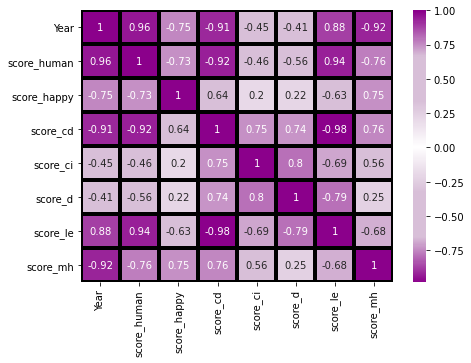

In [12]:
plt.figure(figsize = (7,5))

cmap = LinearSegmentedColormap.from_list(
    name='test', 
    colors=['darkmagenta','thistle','thistle','white','thistle','thistle','darkmagenta']
)
_=sns.heatmap(df_merged.corr(), annot=True,cmap=cmap,linewidths=3, linecolor='black')

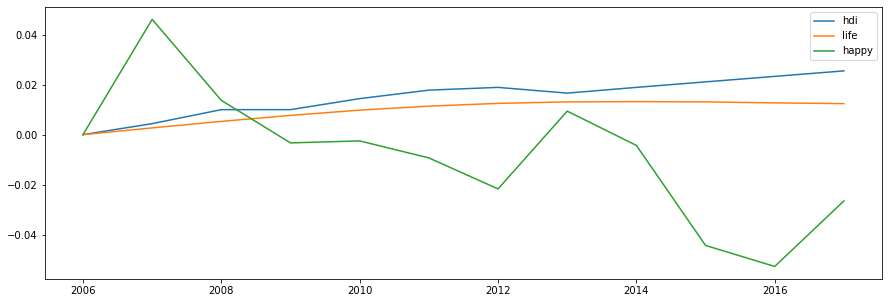

In [13]:
plt.figure(figsize = (15,5))
plt.plot(df_merged['Year'],df_merged['score_human'], label = 'hdi')
plt.plot(df_merged['Year'],df_merged['score_le'],label = 'life')
plt.plot(df_merged['Year'],df_merged['score_happy'],label = 'happy')
plt.legend()

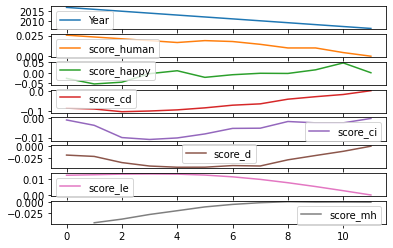

In [14]:
_=df_merged.plot(subplots = True)

In [15]:
df_merged

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh
0,United States,2017,0.0255,-0.0265,-0.0873,-0.0008,-0.0193,0.0124,NaN
1,United States,2016,0.0233,-0.0527,-0.0916,-0.0036,-0.0222,0.0127,-0.0460
2,United States,2015,0.0211,-0.0443,-0.1051,-0.0100,-0.0356,0.0131,-0.0379
3,United States,2014,0.0189,-0.0043,-0.1016,-0.0110,-0.0431,0.0132,-0.0275
4,United States,2013,0.0166,0.0094,-0.0959,-0.0102,-0.0457,0.0131,-0.0191
5,United States,2012,0.0189,-0.0217,-0.0858,-0.0081,-0.0456,0.0125,-0.0106
6,United States,2011,0.0178,-0.0093,-0.0725,-0.0052,-0.0421,0.0114,-0.0050
7,United States,2010,0.0144,-0.0025,-0.0658,-0.0051,-0.0430,0.0098,-0.0012
8,United States,2009,0.0100,-0.0033,-0.0425,-0.0016,-0.0296,0.0077,0.0010
9,United States,2008,0.0100,0.0137,-0.0300,-0.0023,-0.0202,0.0053,0.0001


# Transform the dataframe: <br>
    For all data, multiply by the correlation to hdi(score_human)

In [16]:
#make dfs for storage
score_cd = []
score_ci = []
score_d = []
score_le = []
score_mh = []
#organize dfs in a dictionary
names_dic = { 3 : score_cd, 
              4 : score_ci, 
              5 : score_d, 
              6 : score_le,
              7 : score_mh}

#make variables for the loop
col_count = len(df_merged.columns)-4
col = 4
corr_col = 3
dic_ind = 3
columns_list = list(df_merged.columns)

In [17]:
for x in list(names_dic)[:]:  
    #will put the weight into the first dictionary
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_col]
        num = i * corr 
        names_dic[dic_ind].append(num)
    col +=1
    corr_col += 1
    dic_ind += 1
names_dic

{3: [-0.08070652247328083,
  -0.08468175782992582,
  -0.09716214790311357,
  -0.0939264912174723,
  -0.0886569931865708,
  -0.07931981246514885,
  -0.06702431705971203,
  -0.06083034569005588,
  -0.03929011689707257,
  -0.027734200162639458,
  -0.017564993436338324,
  0.0],
 4: [-0.00037187430149860073,
  -0.001673434356743703,
  -0.004648428768732509,
  -0.005113271645605759,
  -0.004741397344107159,
  -0.003765227302673332,
  -0.0024171829597409043,
  -0.0023706986720535795,
  -0.0007437486029972015,
  -0.001069138616808477,
  -0.001069138616808477,
  0.0],
 5: [-0.010891743107924632,
  -0.012528326269219006,
  -0.02009046915244129,
  -0.02432301181096122,
  -0.025790293265914796,
  -0.0257338593638012,
  -0.02375867278982523,
  -0.02426657790884762,
  -0.016704435025625342,
  -0.011399648226947022,
  -0.006264163134609503,
  -0.0],
 6: [0.011652834150459215,
  0.011934757557325164,
  0.01231065543314643,
  0.012404629902101746,
  0.01231065543314643,
  0.011746808619414533,
  0.0107

ci = []
col = 5
corr_row = 4
while col <= col_count:
    for i in df_merged.iloc[:,col]:
        corr = df_corr.iloc[1][corr_row]
        num = i * corr 
        ci.append(num)
        col += 1
print(ci)

for i in df_merged.columns[4:]:
    while col <= col_count:
        for i in df_merged.iloc[:,col]:
            corr = df_corr.iloc[1][corr_row]
            num = i * corr 
            compiled.append(num)
            col += 1
    col = 5
    corr_row = 4
print(compiled)

In [18]:
#set back to df
second = pd.DataFrame(data = names_dic)
second.columns = ['weighted_cd','weighted_ci','weighted_d','weighted_le','weighted_mh']
second['year'] = [2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006]
final = df_merged.merge(second, how = 'left', left_on ='Year', right_on = 'year')
final

,Entity,Year,score_human,score_happy,score_cd,score_ci,score_d,score_le,score_mh,weighted_cd,weighted_ci,weighted_d,weighted_le,weighted_mh,year
0,United States,2017,0.0255,-0.0265,-0.0873,-0.0008,-0.0193,0.0124,NaN,-0.080707,-0.000372,-0.010892,0.011653,NaN,2017
1,United States,2016,0.0233,-0.0527,-0.0916,-0.0036,-0.0222,0.0127,-0.0460,-0.084682,-0.001673,-0.012528,0.011935,-0.035187,2016
2,United States,2015,0.0211,-0.0443,-0.1051,-0.0100,-0.0356,0.0131,-0.0379,-0.097162,-0.004648,-0.020090,0.012311,-0.028991,2015
3,United States,2014,0.0189,-0.0043,-0.1016,-0.0110,-0.0431,0.0132,-0.0275,-0.093926,-0.005113,-0.024323,0.012405,-0.021036,2014
4,United States,2013,0.0166,0.0094,-0.0959,-0.0102,-0.0457,0.0131,-0.0191,-0.088657,-0.004741,-0.025790,0.012311,-0.014610,2013
5,United States,2012,0.0189,-0.0217,-0.0858,-0.0081,-0.0456,0.0125,-0.0106,-0.079320,-0.003765,-0.025734,0.011747,-0.008108,2012
6,United States,2011,0.0178,-0.0093,-0.0725,-0.0052,-0.0421,0.0114,-0.0050,-0.067024,-0.002417,-0.023759,0.010713,-0.003825,2011
7,United States,2010,0.0144,-0.0025,-0.0658,-0.0051,-0.0430,0.0098,-0.0012,-0.060830,-0.002371,-0.024267,0.009209,-0.000918,2010
8,United States,2009,0.0100,-0.0033,-0.0425,-0.0016,-0.0296,0.0077,0.0010,-0.039290,-0.000744,-0.016704,0.007236,0.000765,2009
9,United States,2008,0.0100,0.0137,-0.0300,-0.0023,-0.0202,0.0053,0.0001,-0.027734,-0.001069,-0.011400,0.004981,0.000076,2008


In [21]:
final.to_csv('second.csv')